In [1]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import dependencies

import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import nltk

import sys
import os
import re



%matplotlib inline

In [3]:
# Load the train dataset

header_list = ["id", "label", "statement", "subject", "speaker", 
               "speaker_job", "speaker_state", "speaker_affiliation", 
               "barely_true_counts", "false_counts", "half_true_counts", 
               "mostly_true_counts", "pants_on_fire_counts", "context"]

train = pd.read_csv('train_final.csv')
train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,ID,label,statement,subject,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,0,2635.json,false,Says the Annies List political group supports ...,abortion,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,1,1,1,1,1,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,2,2,2,2,2,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,3,3,3,3,3,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,4,4,4,4,4,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


In [4]:
# Load the test dataset

header_list = ["id", "label", "statement", "subject", "speaker", 
               "speaker_job", "speaker_state", "speaker_affiliation", 
               "barely_true_counts", "false_counts", "half_true_counts", 
               "mostly_true_counts", "pants_on_fire_counts", "context"]

test = pd.read_csv('test_final.csv')
test.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,ID,label,statement,subject,speaker,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,...,-0.2,0.2,0.067151,0.155968,0.368879,0.198711,0.311238,_0_,"[1, 0]",_NEG_
1,1,1,1,1,1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,...,0.0,0.0,0.050274,0.054154,0.195262,0.069050,0.287632,_1_,"[0, 1]",NaN
2,2,2,2,2,2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,...,-0.8,0.8,0.055874,0.199553,0.115140,0.439826,0.438706,_2_,"[0, 1]",_NEG_
3,3,3,3,3,3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,...,0.0,0.0,0.158225,0.107996,0.289932,0.068629,0.368779,_3_,"[0, 1]",NaN
4,4,4,4,4,4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,...,-0.7,0.7,0.128335,0.119912,0.082317,0.299316,0.283066,_4_,"[0, 1]",_NEG_


In [5]:
# Load the validation dataset

header_list = ["id", "label", "statement", "subject", "speaker", 
               "speaker_job", "speaker_state", "speaker_affiliation", 
               "barely_true_counts", "false_counts", "half_true_counts", 
               "mostly_true_counts", "pants_on_fire_counts", "context"]

valid = pd.read_csv('valid_final.csv')
valid.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,ID,label,statement,subject,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",...,-0.6,0.6,0.085251,0.180450,0.040739,0.330631,0.583834,_0_,"[0, 1]",_NEG_
1,1,1,1,1,1,1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",...,-0.6,0.6,0.189070,0.140504,0.195634,0.322548,0.299147,_1_,"[0, 1]",_NEG_
2,2,2,2,2,2,2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",...,-0.6,0.6,0.231387,0.149656,0.089191,0.242321,0.416213,_2_,"[0, 1]",_NEG_
3,3,3,3,3,3,3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,...,-0.8,0.8,0.147281,0.372924,0.006268,0.392781,0.471563,_3_,"[0, 1]",_NEG_
4,4,4,4,4,4,4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",...,-0.5,0.5,0.127558,0.145139,0.033212,0.185342,0.562715,_4_,"[0, 1]",_NEG_


In [6]:
# checking the size of data

print(train.shape, test.shape, valid.shape)

(10236, 31) (1267, 30) (1283, 31)


## Data cleaning

#### 1. Train dataset

In [7]:
print(train.columns.to_list())

['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment', 'sentiment_score', 'sentiment_magnitude', 'anger', 'fear', 'joy', 'disgust', 'sad', 'speaker_id', 'list', 'sentiment_code']


In [8]:
# Dropping unwanted columns

train_data = train[['label', 'statement']]


In [9]:
print(train_data.head())
print(train_data.shape)

         label                                          statement
0        false  Says the Annies List political group supports ...
1    half-true  When did the decline of coal start? It started...
2  mostly-true  Hillary Clinton agrees with John McCain "by vo...
3        false  Health care reform legislation is likely to ma...
4    half-true  The economic turnaround started at the end of ...
(10236, 2)


In [10]:
# Data observation

train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10236 non-null  object
 1   statement  10236 non-null  object
dtypes: object(2)
memory usage: 160.1+ KB


#### 2. Test dataset

In [11]:
print(test.columns.to_list())

['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment', 'sentiment_score', 'sentiment_magnitude', 'anger', 'fear', 'joy', 'disgust', 'sad', 'speaker_id', 'list', 'sentiment_code']


In [12]:
# Dropping unwanted columns

test_data = test[['label', 'statement']]

In [13]:
print(test_data.head())
print(test_data.shape)

        label                                          statement
0        true  Building a wall on the U.S.-Mexico border will...
1       false  Wisconsin is on pace to double the number of l...
2       false  Says John McCain has done nothing to help the ...
3   half-true  Suzanne Bonamici supports a plan that will cut...
4  pants-fire  When asked by a reporter whether hes at the ce...
(1267, 2)


In [14]:
# Data observation

test_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1267 non-null   object
 1   statement  1267 non-null   object
dtypes: object(2)
memory usage: 19.9+ KB


#### 3. Valid dataset

In [15]:
print(valid.columns.to_list())

['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment', 'sentiment_score', 'sentiment_magnitude', 'anger', 'fear', 'joy', 'disgust', 'sad', 'speaker_id', 'list', 'sentiment_code']


In [16]:
# Dropping unwanted columns

valid_data = valid[['label', 'statement']]

In [17]:
print(valid_data.head())
print(valid_data.shape)

         label                                          statement
0  barely-true  We have less Americans working now than in the...
1   pants-fire  When Obama was sworn into office, he DID NOT u...
2        false  Says Having organizations parading as being so...
3    half-true     Says nearly half of Oregons children are poor.
4    half-true  On attacks by Republicans that various program...
(1283, 2)


In [18]:
# Data observation

valid_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1283 non-null   object
 1   statement  1283 non-null   object
dtypes: object(2)
memory usage: 20.2+ KB


In [19]:
# labels by count

len(set(train_data['label'].values))

6

In [20]:
# label distribution

print(train_data['label'].value_counts())
print(valid_data['label'].value_counts())
print(test_data['label'].value_counts())


half-true      2113
false          1992
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64
false          263
mostly-true    251
half-true      248
barely-true    237
true           169
pants-fire     115
Name: label, dtype: int64
half-true      265
false          249
mostly-true    241
barely-true    212
true           208
pants-fire      92
Name: label, dtype: int64


In [21]:
# Mapping the lables into 'True' and 'False'

def map_lables(train,test,valid):
    labels_dict = {'true': 'true','mostly-true': 'true',
                    'half-true':'true', 'false':'false', 
                    'barely-true':'false','pants-fire':'false'}
    
    train= train_data.replace({"label": labels_dict})[['label','statement']]
    test = test_data.replace({"label": labels_dict})[['label','statement']]
    valid = valid_data.replace({"label": labels_dict})[['label','statement']]
    display(train.head(), test.head(), valid.head())
    
    return train, test, valid

In [22]:
train_news, test_news, valid_news = map_lables(train,test,valid)

,label,statement
0,false,Says the Annies List political group supports ...
1,true,When did the decline of coal start? It started...
2,true,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...
4,true,The economic turnaround started at the end of ...


,label,statement
0,true,Building a wall on the U.S.-Mexico border will...
1,false,Wisconsin is on pace to double the number of l...
2,false,Says John McCain has done nothing to help the ...
3,true,Suzanne Bonamici supports a plan that will cut...
4,false,When asked by a reporter whether hes at the ce...


,label,statement
0,false,We have less Americans working now than in the...
1,false,"When Obama was sworn into office, he DID NOT u..."
2,false,Says Having organizations parading as being so...
3,true,Says nearly half of Oregons children are poor.
4,true,On attacks by Republicans that various program...


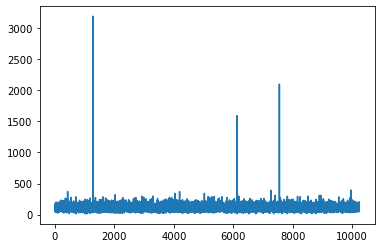

In [23]:
# checking for outliers / i.e length of the sentences for training dataset

train_statement_lengths = [len(statement) for statement in train_news['statement']]
plt.plot(train_statement_lengths)
plt.show()

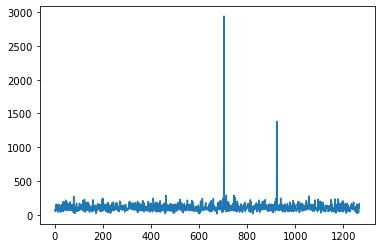

In [24]:
# checking for outliers / i.e length of the sentences for testing dataset

test_statement_lengths = [len(statement) for statement in test_news['statement']]
plt.plot(test_statement_lengths)
plt.show()

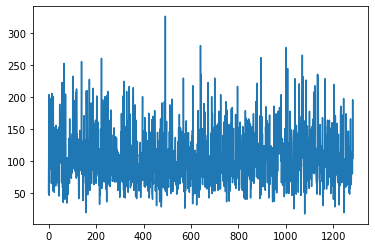

In [25]:
# checking for outliers / i.e length of the sentences for validtation dataset

valid_statement_lengths = [len(statement) for statement in valid_news['statement']]
plt.plot(valid_statement_lengths)
plt.show()

From the above plot it is clear that there are some sentences which are extremly long.Let us drop these sentences in order to free our datset from outliers.

In [26]:
train_news['len'] = [len(statement) for statement in train_news['statement']]

In [27]:
# outliers in train set

train_news[(train_news['len'] > 1000)]

,label,statement,len
1280,true,"Hospitals, doctors, MRIs, surgeries and so for...",3192
6117,true,Georgia has the most restrictive ballot access...,1592
7548,false,The vast majority of the money I got was from ...,2099


In [28]:
train_news

,label,statement,len
0,false,Says the Annies List political group supports ...,82
1,true,When did the decline of coal start? It started...,141
2,true,"Hillary Clinton agrees with John McCain ""by vo...",105
3,false,Health care reform legislation is likely to ma...,78
4,true,The economic turnaround started at the end of ...,54
...,...,...,...
10231,true,There are a larger number of shark attacks in ...,90
10232,true,Democrats have now become the party of the [At...,78
10233,true,Says an alternative to Social Security that op...,176
10234,false,On lifting the U.S. Cuban embargo and allowing...,62


In [29]:
train_news.iloc[7548]['statement']

'The vast majority of the money I got was from small donors all across the country.\'\'\tcampaign-finance\tbarack-obama\tPresident\tIllinois\tdemocrat\t70\t71\t160\t163\t9\tan interview with CNBC\'s John Harwood \n5802.json\ttrue\tThe Democrat-controlled Senate, it hasnt passed a budget in more than 1,000 days.\tdeficit,federal-budget,job-accomplishments\tjohn-boehner\tSpeaker of the House of Representatives\tOhio\trepublican\t13\t22\t11\t4\t2\ta video address\n6153.json\thalf-true\tThe median income in America has dropped by 10 percent in the last four years.\teconomy,income,jobs\tmitt-romney\tFormer governor\tMassachusetts\trepublican\t34\t32\t58\t33\t19\ta speech\n6515.json\tbarely-true\tSays U.S. Senate hopeful Tammy Baldwin voted for a $1 trillion stimulus bill that included a wasteful $800,000 to replace light bulbs.\tenergy,federal-budget,stimulus\tcrossroads-gps\tConservative advocacy group\t\trepublican\t9\t1\t4\t1\t2\ta television ad\n385.json\ttrue\tSays Clinton did not read

In [30]:
test_news['len'] = [len(statement) for statement in test_news['statement']]


In [31]:
# outliers in test set

test_news[(test_news['len'] > 1000)]

,label,statement,len
703,true,"As a state rep, I was considered the fourth-mo...",2941
923,true,Fifty-six percent decline in overall crime. A ...,1380


In [32]:
test_news

,label,statement,len
0,true,Building a wall on the U.S.-Mexico border will...,68
1,false,Wisconsin is on pace to double the number of l...,63
2,false,Says John McCain has done nothing to help the ...,51
3,true,Suzanne Bonamici supports a plan that will cut...,85
4,false,When asked by a reporter whether hes at the ce...,127
...,...,...,...
1262,true,Says his budget provides the highest state fun...,82
1263,false,Ive been here almost every day.,31
1264,false,"In the early 1980s, Sen. Edward Kennedy secret...",147
1265,false,Says an EPA permit languished under Strickland...,96


In [33]:
test_news.iloc[703]['statement']

'As a state rep, I was considered the fourth-most conservative in the Legislature.\tstates\trick-green\t\t\trepublican\t0\t1\t1\t0\t0\ta speech\n2552.json\tmostly-true\tRand Paul wants us to pay $2,000 just to get Medicare.\thealth-care,medicare,message-machine\tjack-conway\tKentucky Attorney General\tKentucky\tdemocrat\t0\t1\t0\t2\t0\ta campaign commercial\n9353.json\tmostly-true\tSays Hillary Clinton opposed an individual mandate and favored an employer mandate back in 1993.\thealth-care,public-health\tbobby-jindal\tGovernor of Louisiana\tLouisiana\trepublican\t0\t1\t4\t4\t0\tan op-ed for Politico Magazine\n9577.json\tmostly-true\tThere are more than 46 million Americans living in poverty today -- the largest number in 54 years.\tmedicaid,poverty\tkirk-cox\tHouse majority leader\tVirginia\trepublican\t0\t0\t0\t1\t0\ta speech.\n4318.json\thalf-true\tSince I introduced my budget -- first budget -- in March of 2010, weve created 50,000 new private-sector jobs for the people of this stat

In [34]:
valid_news['len'] = [len(statement) for statement in valid_news['statement']]

In [35]:
valid_news[(valid_news['len'] > 1000)]

,label,statement,len


In [36]:
valid_news

,label,statement,len
0,false,We have less Americans working now than in the...,51
1,false,"When Obama was sworn into office, he DID NOT u...",148
2,false,Says Having organizations parading as being so...,204
3,true,Says nearly half of Oregons children are poor.,46
4,true,On attacks by Republicans that various program...,190
...,...,...,...
1278,true,"For the first time in more than a decade, impo...",104
1279,true,Says Donald Trump has bankrupted his companies...,82
1280,true,"John McCain and George Bush have ""absolutely n...",80
1281,false,A new poll shows 62 percent support the presid...,196


In [37]:
# dropping the rows with incorrect parsing

train_news = train_news[train_news['len'] < 1000]
test_news = test_news[test_news['len'] < 1000]

In [38]:
# Save Cleansed Data to New CSV

train_news.to_csv('revised_train.csv', index=False)
test_news.to_csv('revised_test.csv', index=False)
valid_news.to_csv('revised_valid.csv', index=False)

## Word to vectorized format

In [39]:
# Load the revised datasets

revised_train_news = pd.read_csv('revised_train.csv')
revised_test_news = pd.read_csv('revised_test.csv')
revised_valid_news = pd.read_csv('revised_valid.csv')

In [40]:
# Understanding the data distribution

print("Label Distribution in Training Data")
print(revised_train_news['label'].value_counts())

print("Label Distribution in Test Data")
print(revised_test_news['label'].value_counts())

print("Label Distribution in Valid Data")
print(revised_valid_news['label'].value_counts())

Label Distribution in Training Data
True     5749
False    4484
Name: label, dtype: int64
Label Distribution in Test Data
True     712
False    553
Name: label, dtype: int64
Label Distribution in Valid Data
True     668
False    615
Name: label, dtype: int64


From the above output of labels distribution it seems like 'True' and 'False' are almost equally distributed in the dataset.

In [41]:
# Display train news

display(revised_train_news.groupby('label').describe())

len                                                        
        count        mean        std   min   25%    50%    75%    max
label                                                                
False  4484.0  103.626227  44.916895  11.0  71.0   96.0  130.0  391.0
True   5749.0  108.264394  45.199488  11.0  75.0  101.0  135.0  395.0

In [42]:
# Display test news

display(revised_test_news.groupby('label').describe())

len                                                        
       count        mean        std   min   25%    50%    75%    max
label                                                               
False  553.0  103.687161  43.302962  12.0  73.0   96.0  130.0  288.0
True   712.0  108.393258  45.626933  14.0  76.0  100.0  136.0  289.0

In [43]:
# Display valid news

display(revised_valid_news.groupby('label').describe())

len                                                        
       count        mean        std   min   25%    50%    75%    max
label                                                               
False  615.0  103.385366  43.622038  17.0  71.5   95.0  132.0  278.0
True   668.0  109.893713  45.363490  25.0  77.0  102.0  136.0  327.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9df55def70>,
      dtype=object)

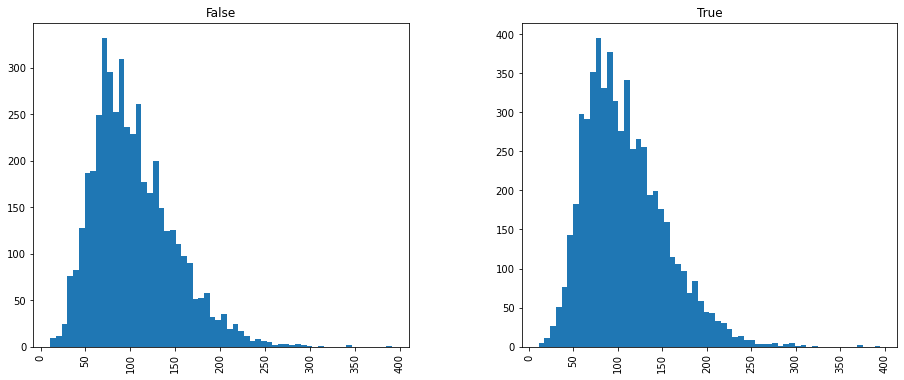

In [44]:
# Plot for training set

revised_train_news.hist(column='len',by='label',bins=60, figsize=(15,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dfbe19820>,
      dtype=object)

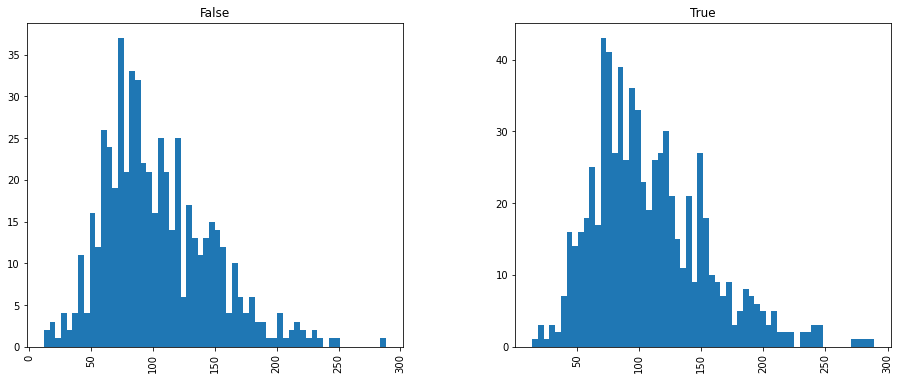

In [45]:
# Plot for testing set

revised_test_news.hist(column='len',by='label',bins=60, figsize=(15,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dfc2a3c10>,
      dtype=object)

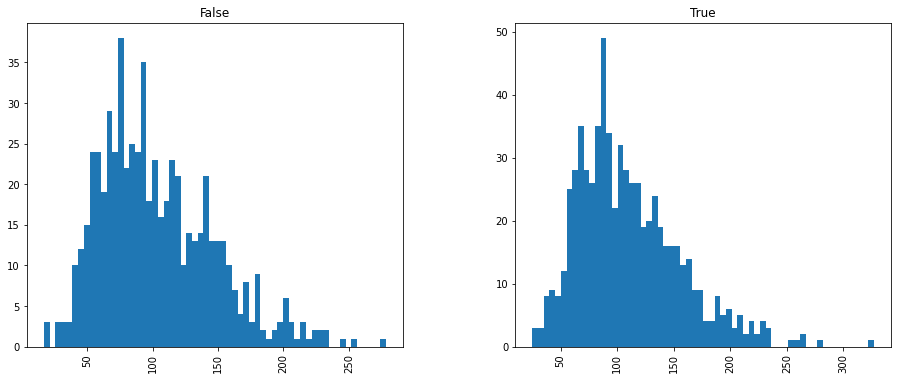

In [46]:
# Plot for validation set

revised_valid_news.hist(column='len',by='label',bins=60, figsize=(15,6))

## Basic Text pre-processing

In [47]:
# Import stopwords with scikit-learn

from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [48]:
revised_train_news

,label,statement,len
0,False,Says the Annies List political group supports ...,82
1,True,When did the decline of coal start? It started...,141
2,True,"Hillary Clinton agrees with John McCain ""by vo...",105
3,False,Health care reform legislation is likely to ma...,78
4,True,The economic turnaround started at the end of ...,54
...,...,...,...
10228,True,There are a larger number of shark attacks in ...,90
10229,True,Democrats have now become the party of the [At...,78
10230,True,Says an alternative to Social Security that op...,176
10231,False,On lifting the U.S. Cuban embargo and allowing...,62


In [49]:
# 1. Training set

# Remove punctuation
revised_train_news['statement_processed'] = revised_train_news['statement'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
revised_train_news['statement_processed'] = revised_train_news['statement_processed'].str.lower()

# Remove stopwords
revised_train_news['statement_processed'] = revised_train_news['statement_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Print the processed titles of the first rows 
print(revised_train_news.head())


   label                                          statement  len  \
0  False  Says the Annies List political group supports ...   82   
1   True  When did the decline of coal start? It started...  141   
2   True  Hillary Clinton agrees with John McCain "by vo...  105   
3  False  Health care reform legislation is likely to ma...   78   
4   True  The economic turnaround started at the end of ...   54   

                                 statement_processed  
0  says annies list political group supports thir...  
1  did decline coal start started natural gas too...  
2  hillary clinton agrees john mccain "by voting ...  
3  health care reform legislation likely mandate ...  
4               economic turnaround started end term  


In [50]:
revised_test_news

,label,statement,len
0,True,Building a wall on the U.S.-Mexico border will...,68
1,False,Wisconsin is on pace to double the number of l...,63
2,False,Says John McCain has done nothing to help the ...,51
3,True,Suzanne Bonamici supports a plan that will cut...,85
4,False,When asked by a reporter whether hes at the ce...,127
...,...,...,...
1260,True,Says his budget provides the highest state fun...,82
1261,False,Ive been here almost every day.,31
1262,False,"In the early 1980s, Sen. Edward Kennedy secret...",147
1263,False,Says an EPA permit languished under Strickland...,96


In [51]:
# 2. Test dataset

# Remove punctuation
revised_test_news['statement_processed'] = revised_test_news['statement'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
revised_test_news['statement_processed'] = revised_test_news['statement_processed'].str.lower()

# Remove stopwords
revised_test_news['statement_processed'] = revised_test_news['statement_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Print the processed titles of the first rows 
print(revised_test_news.head())

   label                                          statement  len  \
0   True  Building a wall on the U.S.-Mexico border will...   68   
1  False  Wisconsin is on pace to double the number of l...   63   
2  False  Says John McCain has done nothing to help the ...   51   
3   True  Suzanne Bonamici supports a plan that will cut...   85   
4  False  When asked by a reporter whether hes at the ce...  127   

                                 statement_processed  
0     building wall us-mexico border literally years  
1          wisconsin pace double number layoffs year  
2                         says john mccain help vets  
3  suzanne bonamici supports plan cut choice medi...  
4  asked reporter hes center criminal scheme viol...  


In [52]:
revised_valid_news

,label,statement,len
0,False,We have less Americans working now than in the...,51
1,False,"When Obama was sworn into office, he DID NOT u...",148
2,False,Says Having organizations parading as being so...,204
3,True,Says nearly half of Oregons children are poor.,46
4,True,On attacks by Republicans that various program...,190
...,...,...,...
1278,True,"For the first time in more than a decade, impo...",104
1279,True,Says Donald Trump has bankrupted his companies...,82
1280,True,"John McCain and George Bush have ""absolutely n...",80
1281,False,A new poll shows 62 percent support the presid...,196


In [53]:
# 3. Validation set

# Remove punctuation
revised_valid_news['statement_processed'] = revised_valid_news['statement'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
revised_valid_news['statement_processed'] = revised_valid_news['statement_processed'].str.lower()

# Remove stopwords
revised_valid_news['statement_processed'] = revised_valid_news['statement_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Print the processed titles of the first rows 
print(revised_valid_news.head())

   label                                          statement  len  \
0  False  We have less Americans working now than in the...   51   
1  False  When Obama was sworn into office, he DID NOT u...  148   
2  False  Says Having organizations parading as being so...  204   
3   True     Says nearly half of Oregons children are poor.   46   
4   True  On attacks by Republicans that various program...  190   

                                 statement_processed  
0                              americans working 70s  
1  obama sworn office did use holy bible instead ...  
2  says having organizations parading social welf...  
3             says nearly half oregons children poor  
4  attacks republicans various programs economic ...  


## CountVectorizer

In [54]:
# 1. Train dataset

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')
vect_train = vect.fit_transform(revised_train_news.statement_processed)
vect_train_dtm = pd.DataFrame(vect_train.toarray(), columns=vect.get_feature_names())
vect_train_dtm.index = revised_train_news.index
vect_train_dtm

,005,01,02,025,03,04,047,05,06,07,...,zip,zippo,zombie,zombies,zone,zones,zoning,zoo,zuckerberg,zuckerbergs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# 2. Test dataset

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')
vect_test = vect.fit_transform(revised_test_news.statement_processed)
vect_test_dtm = pd.DataFrame(vect_test.toarray(), columns=vect.get_feature_names())
vect_test_dtm.index = revised_test_news.index
vect_test_dtm

,00,02,05,06,07,08,09,10,100,1000,...,yes,york,young,youre,youth,youtube,youve,zero,zika,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# 3. Validation dataset

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')
vect_valid = vect.fit_transform(revised_valid_news.statement_processed)
vect_valid_dtm = pd.DataFrame(vect_valid.toarray(), columns=vect.get_feature_names())
vect_valid_dtm.index = revised_valid_news.index
vect_valid_dtm

,004,04,08,10,100,1000,10000,100000,102000,103000,...,young,younger,youngsters,youre,youth,youve,zero,zika,zone,ʺmore
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tfidf Weighting

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
# 1. Train dataset

tfidf_vect = TfidfVectorizer(use_idf=True, max_df=0.95)
tfidf_train_matrix = tfidf_vect.fit_transform(revised_train_news.statement_processed)
tfidf_train_matrix = tfidf_train_matrix.toarray()
tfidf_train_matrix.shape

(10233, 12321)

In [59]:
print(tfidf_train_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [60]:
# 2. Test dataset

tfidf_vect = TfidfVectorizer(use_idf=True, max_df=0.95)
tfidf_test_matrix = tfidf_vect.fit_transform(revised_test_news.statement_processed)
tfidf_test_matrix = tfidf_test_matrix.toarray()
tfidf_test_matrix.shape

(1265, 4183)

In [61]:
print(tfidf_test_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
# 3. Validation dataset

tfidf_vect = TfidfVectorizer(use_idf=True, max_df=0.95)
tfidf_valid_matrix = tfidf_vect.fit_transform(revised_valid_news.statement_processed)
tfidf_valid_matrix = tfidf_valid_matrix.toarray()
tfidf_valid_matrix.shape

(1283, 4253)

In [63]:
print(tfidf_valid_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## T-SNE : t-distributed stochastic neighbor embedding

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


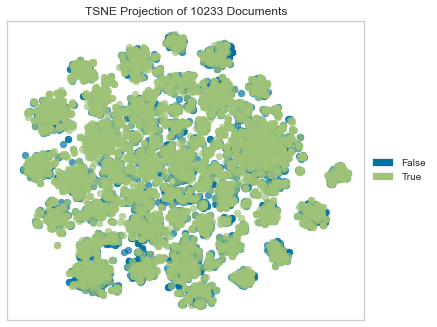

(10233, 12321)


In [64]:
from yellowbrick.text import TSNEVisualizer

# 1. Train dataset

tfidf_train_matrix = tfidf_vect.fit_transform(revised_train_news['statement_processed'].values)

Y = revised_train_news.label.values

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(tfidf_train_matrix, Y)
tsne.show()

print(tfidf_train_matrix.shape)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


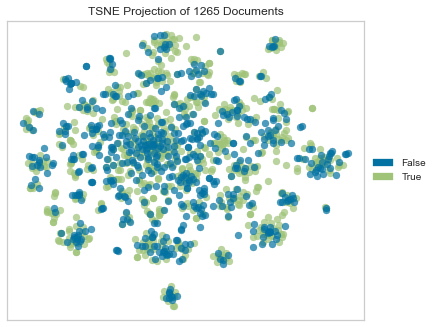

(1265, 4183)


In [65]:
# 2. Test dataset

tfidf_test_matrix = tfidf_vect.fit_transform(revised_test_news['statement_processed'].values)

Y = revised_test_news.label.values

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(tfidf_test_matrix, Y)
tsne.show()

print(tfidf_test_matrix.shape)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


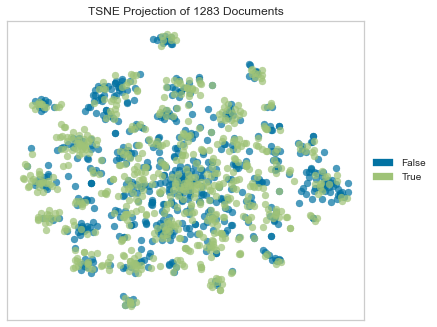

(1283, 4253)


In [66]:
# 3. Validation dataset

tfidf_valid_matrix = tfidf_vect.fit_transform(revised_valid_news['statement_processed'].values)

Y = revised_valid_news.label.values

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(tfidf_valid_matrix, Y)
tsne.show()

print(tfidf_valid_matrix.shape)

In [67]:
%%time

import gensim

#Dimension of vectors we are generating
EMBEDDING_DIM = 300

#loading pretrained model
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.fill_norms()

/Applications/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


CPU times: user 41.9 s, sys: 6.41 s, total: 48.3 s
Wall time: 52.6 s


In [68]:
from itertools import islice
list(islice(wv.key_to_index, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [69]:
# vocab size

len(wv.key_to_index)

3000000

In [70]:
# Printing similarity index

print(wv.most_similar('Trump'))

[('Donald_Trump', 0.8103920221328735), ('impersonator_entertained', 0.5942257642745972), ('Ivanka_Trump', 0.5924582481384277), ('Ivanka', 0.560720682144165), ('mogul_Donald_Trump', 0.559245228767395), ('Trump_Tower', 0.548555314540863), ('Kepcher', 0.5468589067459106), ('billionaire_Donald_Trump', 0.5447270274162292), ('Trumpster', 0.5412819385528564), ('tycoon_Donald_Trump', 0.5383971929550171)]


In [71]:
# Word averaging

def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        #logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [72]:
# Word averaging

def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.wv.vocab:
            mean.append(wv.wv.syn0[wv.wv.vocab[word].index])
            all_words.add(wv.wv.vocab[word].index)


    if not mean:
        #logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, clean_title_publish) for clean_title_publish in text_list])

In [73]:
# Tokenization

def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

## Splitting the dataset

In [74]:
X_train = revised_train_news['statement_processed']
Y_train = revised_train_news['label']
X_test = revised_test_news['statement_processed']
Y_test = revised_test_news['label']

In [75]:
X_train.shape

(10233,)

In [76]:
Y_train.shape

(10233,)

In [77]:
X_test.shape

(1265,)

In [78]:
Y_test.shape

(1265,)

In [79]:
%%time


X_train_tokenized = X_train.apply(lambda r: w2v_tokenize_text(r['statement_processed'])).values
Y_train_tokenized = Y_train.apply(lambda r: w2v_tokenize_text(r['label'])).values
X_test_tokenized = X_test.apply(lambda r: w2v_tokenize_text(r['statement_processed'])).values
Y_test_tokenized = Y_test.apply(lambda r: w2v_tokenize_text(r['label'])).values

TypeError: string indices must be integers

In [80]:
X_train_word_average = word_averaging_list(wv,X_train_tokenized)
Y_train_word_average = word_averaging_list(wv,Y_train_tokenized)
X_test_word_average = word_averaging_list(wv,X_test_tokenized)
Y_test_word_average = word_averaging_list(wv,Y_test_tokenized)

NameError: name 'X_train_tokenized' is not defined

In [ ]:
X_train_word_average

In [ ]:
Y_train_word_average

In [ ]:
X_test_word_average

In [ ]:
Y_test_word_average